# analysis of sequential RNA-FISH for CTP12

by Pu Zheng

2021.11.30

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA


# Load basic functions

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

creating new log file
2021-12-12 12:56:11,188 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log
37872


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA',
             'save_folder':r'F:\Pu_Temp\20211206-P_brain_CTP12-RNA',
             'experiment_type': 'RNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':500,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1500,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }

In [4]:
64+68

132

In [6]:
# 0-64
# 64-132

#0-18 processed, 12.8

# process 18-40
# use Franklin for 41-65

_overwrite = False

for _fov_id in np.arange(64,132):
    # create fov class
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True,
                                              )
    
    fov.shared_parameters['corr_gaussian_highpass'] = True
    _warp = False
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.rna_ref_id = 0

    fov._process_image_to_spots('rna', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=_warp, 
                                _fit_spots=True,
                                _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    
    fov.shared_parameters['corr_gaussian_highpass'] = False

    # 2. Process image into candidate spots
    fov.parallel = False
    fov.protein_ref_id = 0

    fov._process_image_to_spots('protein', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=True, 
                                _fit_spots=False,
                                _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)

    dapi_im = fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 383
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0R1', 'H1R2', 'H2R3', 'H3R4', 'H4R5', 'H5R6', 'H6R7', 'H7R8', 'H8R9', 'H9R10', 'H10R11', 'H11R12', 'H12R13', 'H13R14'])
- 14 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
++ lo

-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_065.dax  in 3.748s
-- removing hot pixels for channels:['405'] in 8.662s
-- correct Z-shifts for channels:['405'] in 5.997s
-- illumination correction for channels: 405, in 2.686s
-- warp image with drift:[0. 0. 0.] in 0.003s
-- finish correction in 22.204s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_065.hdf5
++ base attributes saved:['dapi_im'] in 7.803s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 383
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0R1', 'H1R2', 'H2R3', 'H3R4', 'H4R5', 'H5R6', 'H6R7', 'H7R8', 'H8R9', 'H9R10', 'H10R11', 'H11R12', 'H12R13', 'H13R14'])
- 14 folders are found according to color-usage annotation.
++ load bleed correction profil

-- finish correction in 66.820s
- writting protein info to file:F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_066.hdf5
-- updated ims for id:[1], drifts for id:[1] in 1.658s
-- no updates in drift, skip.
in 69.66s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_066.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_066.dax  in 3.651s
-- removing hot pixels for channels:['405'] in 9.865s
-- correct Z-shifts for channels:['405'] in 6.458s
-- illumination correction for channels: 405, in 2.704s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 23.592s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_066.hdf5
++ base attribut

-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_067.dax  in 4.068s
-- removing hot pixels for channels:['488', '561'] in 20.830s
-- correct Z-shifts for channels:['488', '561'] in 16.366s
-- illumination correction for channels: 488, 561, in 6.062s
-- apply bead_drift calculate for channel: 561
-- start aligning given source image to given reference image.
--- align image 0 in 8.467s.
--- align image 1 in 8.132s.
--- align image 2 in 8.028s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 24.893s
-- warp image with chromatic correction for channels: [] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 72.904s
- writting protein info to file:F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_067.hdf5
-- updated ims for id:[1], drifts for id:[1] in 1.795s
-- no updates in drift, skip.
in 75.74s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\

++ base attributes saved:['protein_ref_im'] in 7.405s.
-- checking protein, region:[1] in 0.009s.
+ Start sequential pre-processing for 1 images
++ processed protein ids: [1] + batch process image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_068.dax for channels:['488']
- loading protein info from file:Conv_zscan_068.hdf5 in 0.309s.
-- ['488'] images are required to process, [] images are loaded from save file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_068.hdf5
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_068.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_068.dax  in 3.997s
-- removing hot pixels for channels:['488', '561'] in 20.015s
-- correct Z-shifts for channels:['488', '561'] in 12.292s
-- illumination correction for channels: 488, 561, in 5.359s
-- apply bead_drift calculate for channel: 561
-- start aligning given sour

-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_069.dax  in 5.573s
-- removing hot pixels for channels:['561'] in 9.419s
-- correct Z-shifts for channels:['561'] in 7.567s
-- illumination correction for channels: 561, in 2.578s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 26.086s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_069.hdf5
++ base attributes saved:['protein_ref_im'] in 7.733s.
-- checking protein, region:[1] in 0.008s.
+ Start sequential pre-processing for 1 images
++ processed protein ids: [1] + batch process image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_069.dax for channels:['488']
- loading protein info from file:Conv_zscan_069.hdf5 in 0.307s.
-- ['488'] images are required to process, [] images are loaded from save file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_069.hdf5
- correct the whole fov for 

 25 26 27 28] , finish in 2400.08s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_070.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_070.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_070.dax  in 6.379s
-- removing hot pixels for channels:['561'] in 9.492s
-- correct Z-shifts for channels:['561'] in 7.464s
-- illumination correction for channels: 561, in 3.145s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 27.520s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_070.hdf5
++ base attributes saved:['protein_ref_im'] in 7.921s.
-- checking protein, region:[1] in 0.008s.
+ Sta

+ Start multi-processing of pre-processing for 14 images with 16 threads
++ processing rna ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] , finish in 2563.45s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_071.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_071.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_071.dax  in 6.577s
-- removing hot pixels for channels:['561'] in 10.062s
-- correct Z-shifts for channels:['561'] in 7.825s
-- illumination correction for channels: 561, in 3.564s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 29.258s
-- saving fov_info 

++ base attributes saved:['rna_ref_im'] in 9.269s.
-- checking rna, region:[1 2] in 0.012s.
-- checking rna, region:[3 4] in 0.010s.
-- checking rna, region:[5 6] in 0.009s.
-- checking rna, region:[7 8] in 0.009s.
-- checking rna, region:[ 9 10] in 0.010s.
-- checking rna, region:[11 12] in 0.009s.
-- checking rna, region:[13 14] in 0.008s.
-- checking rna, region:[15 16] in 0.008s.
-- checking rna, region:[17 18] in 0.008s.
-- checking rna, region:[19 20] in 0.008s.
-- checking rna, region:[21 22] in 0.009s.
-- checking rna, region:[23 24] in 0.008s.
-- checking rna, region:[25 26] in 0.009s.
-- checking rna, region:[27 28] in 0.008s.
+ Start multi-processing of pre-processing for 14 images with 16 threads
++ processing rna ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] , finish in 2371.43s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H

-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_073.dax  in 7.612s
-- removing hot pixels for channels:['561'] in 11.505s
-- correct Z-shifts for channels:['561'] in 9.144s
-- illumination correction for channels: 561, in 4.316s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 33.983s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_073.hdf5
++ base attributes saved:['rna_ref_im'] in 8.841s.
-- checking rna, region:[1 2] in 0.013s.
-- checking rna, region:[3 4] in 0.010s.
-- checking rna, region:[5 6] in 0.009s.
-- checking rna, region:[7 8] in 0.009s.
-- checking rna, region:[ 9 10] in 0.010s.
-- checking rna, region:[11 12] in 0.010s.
-- checking rna, region:[13 14] in 0.009s.
-- checking rna, region:[15 16] in 0.010s.
-- checking rna, region:[17 18] in 0.010s.
-- checking rna, region:[19 20] in 0.010s.
-- checking rna, region:[21 22] in 0.010s.
-- checking rna

-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_074.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_074.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_074.dax  in 6.494s
-- removing hot pixels for channels:['561'] in 12.879s
-- correct Z-shifts for channels:['561'] in 8.698s
-- illumination correction for channels: 561, in 3.259s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 32.225s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_074.hdf5
++ base attributes saved:['rna_ref_im'] in 9.103s.
-- checking rna, region:[1 2] in 0.011s.
-- checking rna, region:[3 4] in 0.010s.
-- ch

-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_075.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_075.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.011s.
save type: protein"
-- saving protein to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_075.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_075.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_075.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_N

-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_076.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_076.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_076.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_076.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_076.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_076.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.012s.
save type: protein"
-- saving protein to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_076.hdf5
--- protein attributes updated:['ids', 'c

-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_077.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_077.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_077.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_077.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_077.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_077.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_077.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_077.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_078.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_078.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_078.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_078.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_078.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_078.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_078.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_078.hdf5
--- rna attributes updated:['ids', '

-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_079.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_079.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_079.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_079.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_079.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_079.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_079.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_079.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_

++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 0.018s.
-- saving segmentation to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_080.hdf5
-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_080.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_080.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_080.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brai

	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_081.dax: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_081.hdf5.
* create savefile: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_081.hdf5
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_081.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 0.017s.
-- saving segmentation to file: F:\Pu_Temp\20211206-P_

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
- Creating save file for fov:Conv_zscan_082.dax: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_082.hdf5.
* create savefile: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_082.hdf5
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_082.hdf5
++ base

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 383
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0R1', 'H1R2', 'H2R3', 'H3R4', 'H4R5', 'H5R6', 'H6R7', 'H7R8', 'H8R9', 'H9R10', 'H10R11', 'H11R12', 'H12R13', 'H13R14'])
- 14 folders are found according to color-usage annotation.
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
++ lo

-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_083.dax  in 3.777s
-- removing hot pixels for channels:['405'] in 8.844s
-- correct Z-shifts for channels:['405'] in 6.198s
-- illumination correction for channels: 405, in 2.640s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 22.442s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_083.hdf5
++ base attributes saved:['dapi_im'] in 7.517s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 383
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0R1', 'H1R2', 'H2R3', 'H3R4', 'H4R5', 'H5R6', 'H6R7', 'H7R8', 'H8R9', 'H9R10', 'H10R11', 'H11R12', 'H12R13', 'H13R14'])
- 14 folders are found according to color-usage annotation.
++ load bleed correction profil

-- finish correction in 69.037s
- writting protein info to file:F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_084.hdf5
-- updated ims for id:[1], drifts for id:[1] in 1.700s
-- no updates in drift, skip.
in 71.96s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_084.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_084.dax  in 3.749s
-- removing hot pixels for channels:['405'] in 9.756s
-- correct Z-shifts for channels:['405'] in 7.146s
-- illumination correction for channels: 405, in 2.812s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 24.429s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_084.hdf5
++ base attribut

-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_085.dax  in 4.109s
-- removing hot pixels for channels:['488', '561'] in 17.979s
-- correct Z-shifts for channels:['488', '561'] in 14.315s
-- illumination correction for channels: 488, 561, in 5.390s
-- apply bead_drift calculate for channel: 561
-- start aligning given source image to given reference image.
--- align image 0 in 8.155s.
--- align image 1 in 8.466s.
--- align image 2 in 8.078s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 25.123s
-- warp image with chromatic correction for channels: [] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 67.614s
- writting protein info to file:F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_085.hdf5
-- updated ims for id:[1], drifts for id:[1] in 1.674s
-- no updates in drift, skip.
in 70.45s.
-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\

++ base attributes saved:['protein_ref_im'] in 7.763s.
-- checking protein, region:[1] in 0.008s.
+ Start sequential pre-processing for 1 images
++ processed protein ids: [1] + batch process image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_086.dax for channels:['488']
- loading protein info from file:Conv_zscan_086.hdf5 in 0.310s.
-- ['488'] images are required to process, [] images are loaded from save file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_086.hdf5
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_086.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_086.dax  in 4.066s
-- removing hot pixels for channels:['488', '561'] in 20.741s
-- correct Z-shifts for channels:['488', '561'] in 15.385s
-- illumination correction for channels: 488, 561, in 5.653s
-- apply bead_drift calculate for channel: 561
-- start aligning given sour

-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_087.dax  in 6.096s
-- removing hot pixels for channels:['561'] in 8.880s
-- correct Z-shifts for channels:['561'] in 6.891s
-- illumination correction for channels: 561, in 2.654s
-- -- generate translation function with drift:[0. 0. 0.] in 0.001s
-- finish correction in 25.461s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_087.hdf5
++ base attributes saved:['protein_ref_im'] in 8.014s.
-- checking protein, region:[1] in 0.009s.
+ Start sequential pre-processing for 1 images
++ processed protein ids: [1] + batch process image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_087.dax for channels:['488']
- loading protein info from file:Conv_zscan_087.hdf5 in 0.313s.
-- ['488'] images are required to process, [] images are loaded from save file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_087.hdf5
- correct the whole fov for 

 25 26 27 28] , finish in 2250.36s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_088.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_088.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_088.dax  in 6.145s
-- removing hot pixels for channels:['561'] in 8.883s
-- correct Z-shifts for channels:['561'] in 7.395s
-- illumination correction for channels: 561, in 2.644s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 26.035s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_088.hdf5
++ base attributes saved:['protein_ref_im'] in 8.035s.
-- checking protein, region:[1] in 0.008s.
+ Sta

 25 26 27 28] , finish in 2410.04s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_089.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_089.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_089.dax  in 6.267s
-- removing hot pixels for channels:['561'] in 8.918s
-- correct Z-shifts for channels:['561'] in 7.165s
-- illumination correction for channels: 561, in 2.654s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 25.969s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_089.hdf5
++ base attributes saved:['protein_ref_im'] in 8.403s.
-- checking protein, region:[1] in 0.010s.
+ Sta

 25 26 27 28] , finish in 2293.93s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_090.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_090.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_090.dax  in 7.045s
-- removing hot pixels for channels:['561'] in 8.974s
-- correct Z-shifts for channels:['561'] in 7.556s
-- illumination correction for channels: 561, in 2.643s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 27.205s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_090.hdf5
++ base attributes saved:['protein_ref_im'] in 7.599s.
-- checking protein, region:[1] in 0.008s.
+ Sta

 25 26 27 28] , finish in 2323.53s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_091.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_091.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_091.dax  in 6.534s
-- removing hot pixels for channels:['561'] in 9.333s
-- correct Z-shifts for channels:['561'] in 7.653s
-- illumination correction for channels: 561, in 2.685s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 27.190s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_091.hdf5
++ base attributes saved:['protein_ref_im'] in 7.821s.
-- checking protein, region:[1] in 0.008s.
+ Sta

 25 26 27 28] , finish in 2567.39s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_092.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_092.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_092.dax  in 6.044s
-- removing hot pixels for channels:['561'] in 8.920s
-- correct Z-shifts for channels:['561'] in 7.643s
-- illumination correction for channels: 561, in 2.650s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 26.232s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_092.hdf5
++ base attributes saved:['protein_ref_im'] in 7.622s.
-- checking protein, region:[1] in 0.010s.
+ Sta

 25 26 27 28] , finish in 2368.71s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_093.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_093.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_093.dax  in 6.188s
-- removing hot pixels for channels:['561'] in 9.364s
-- correct Z-shifts for channels:['561'] in 7.681s
-- illumination correction for channels: 561, in 2.643s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 26.860s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_093.hdf5
++ base attributes saved:['protein_ref_im'] in 7.885s.
-- checking protein, region:[1] in 0.008s.
+ Sta

 25 26 27 28] , finish in 2427.62s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_094.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_094.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_094.dax  in 6.357s
-- removing hot pixels for channels:['561'] in 8.932s
-- correct Z-shifts for channels:['561'] in 7.681s
-- illumination correction for channels: 561, in 2.656s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 26.624s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_094.hdf5
++ base attributes saved:['protein_ref_im'] in 7.784s.
-- checking protein, region:[1] in 0.009s.
+ Sta

 25 26 27 28] , finish in 2194.46s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_095.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_095.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_095.dax  in 6.161s
-- removing hot pixels for channels:['561'] in 9.025s
-- correct Z-shifts for channels:['561'] in 7.671s
-- illumination correction for channels: 561, in 2.667s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 26.533s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_095.hdf5
++ base attributes saved:['protein_ref_im'] in 7.785s.
-- checking protein, region:[1] in 0.008s.
+ Sta

 25 26 27 28] , finish in 2446.17s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_096.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_096.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_096.dax  in 17.673s
-- removing hot pixels for channels:['561'] in 8.958s
-- correct Z-shifts for channels:['561'] in 6.732s
-- illumination correction for channels: 561, in 2.752s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 37.079s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_096.hdf5
++ base attributes saved:['protein_ref_im'] in 7.691s.
-- checking protein, region:[1] in 0.009s.
+ St

 25 26 27 28] , finish in 2542.71s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_097.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_097.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_097.dax  in 6.317s
-- removing hot pixels for channels:['561'] in 9.393s
-- correct Z-shifts for channels:['561'] in 7.387s
-- illumination correction for channels: 561, in 2.684s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 26.814s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_097.hdf5
++ base attributes saved:['protein_ref_im'] in 8.028s.
-- checking protein, region:[1] in 0.011s.
+ Sta

+ Start multi-processing of pre-processing for 14 images with 16 threads
++ processing rna ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] , finish in 2082.33s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_098.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_098.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_098.dax  in 5.734s
-- removing hot pixels for channels:['561'] in 9.724s
-- correct Z-shifts for channels:['561'] in 8.302s
-- illumination correction for channels: 561, in 3.224s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 29.984s
-- saving fov_info t

++ base attributes saved:['rna_ref_im'] in 10.875s.
-- checking rna, region:[1 2] in 0.012s.
-- checking rna, region:[3 4] in 0.009s.
-- checking rna, region:[5 6] in 0.008s.
-- checking rna, region:[7 8] in 0.008s.
-- checking rna, region:[ 9 10] in 0.008s.
-- checking rna, region:[11 12] in 0.008s.
-- checking rna, region:[13 14] in 0.008s.
-- checking rna, region:[15 16] in 0.008s.
-- checking rna, region:[17 18] in 0.007s.
-- checking rna, region:[19 20] in 0.007s.
-- checking rna, region:[21 22] in 0.008s.
-- checking rna, region:[23 24] in 0.009s.
-- checking rna, region:[25 26] in 0.008s.
-- checking rna, region:[27 28] in 0.007s.
+ Start multi-processing of pre-processing for 14 images with 16 threads
++ processing rna ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] , finish in 2114.07s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\

-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_100.dax  in 9.161s
-- removing hot pixels for channels:['561'] in 12.724s
-- correct Z-shifts for channels:['561'] in 9.147s
-- illumination correction for channels: 561, in 3.998s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 37.797s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_100.hdf5
++ base attributes saved:['rna_ref_im'] in 9.384s.
-- checking rna, region:[1 2] in 0.011s.
-- checking rna, region:[3 4] in 0.008s.
-- checking rna, region:[5 6] in 0.007s.
-- checking rna, region:[7 8] in 0.008s.
-- checking rna, region:[ 9 10] in 0.007s.
-- checking rna, region:[11 12] in 0.008s.
-- checking rna, region:[13 14] in 0.008s.
-- checking rna, region:[15 16] in 0.008s.
-- checking rna, region:[17 18] in 0.008s.
-- checking rna, region:[19 20] in 0.008s.
-- checking rna, region:[21 22] in 0.008s.
-- checking rna

-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_101.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_101.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_101.dax  in 7.302s
-- removing hot pixels for channels:['561'] in 9.483s
-- correct Z-shifts for channels:['561'] in 8.489s
-- illumination correction for channels: 561, in 2.942s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 29.165s
-- saving fov_info to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_101.hdf5
++ base attributes saved:['rna_ref_im'] in 9.158s.
-- checking rna, region:[1 2] in 0.010s.
-- checking rna, region:[3 4] in 0.009s.
-- che

-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_102.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_102.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
save type: protein"
-- saving protein to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_102.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
-- folders not selected, allow processing all 14 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_102.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211206-P_brain_CTP12-RNA\H0R1\Conv_zscan_102.dax
-- loading illumination correction profile from file:
	 561 illumination_correction_561_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_N

-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_103.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_103.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_103.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_103.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_103.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_103.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.090s.
save type: protein"
-- saving protein to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_103.hdf5
--- protein attributes updated:['ids', 'c

-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_104.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_104.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_104.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_104.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_104.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_104.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_104.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_104.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_105.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_105.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_105.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_105.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_105.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_105.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_105.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_105.hdf5
--- rna attributes updated:['ids', '

-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_106.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_106.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_106.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_106.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_106.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_106.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_106.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_106.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_

-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_107.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_107.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_107.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_107.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_107.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_107.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_107.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_107.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_108.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_108.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_108.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_108.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_108.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_108.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_108.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_108.hdf5
--- rna attributes updated:['ids', '

-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_109.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_109.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_109.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_109.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_109.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_109.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_109.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_109.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_

-- saving segmentation to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5
-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_110.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'const

-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_111.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_111.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_111.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_111.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_111.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_111.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_111.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_111.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Tem

-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_112.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_112.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_112.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_112.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_112.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_112.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_112.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_112.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Tem

-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_113.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_113.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_113.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_113.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_113.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_113.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_113.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_113.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_

-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_114.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_114.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_114.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_114.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_114.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_114.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_114.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_114.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Tem

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_115.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_115.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_115.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_115.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_115.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_115.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_115.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_115.hdf5
--- rna attributes updated:['ids', '

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_116.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_116.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_116.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_116.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_116.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_116.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_116.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_116.hdf5
--- rna attributes updated:['ids', '

-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_117.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_117.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_117.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_117.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_117.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_117.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_117.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_117.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving

-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_118.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_118.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_118.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_118.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_118.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_118.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_118.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_118.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Tem

-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_119.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_119.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_119.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_119.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_119.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_119.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_119.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_119.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_

-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_120.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_120.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_120.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_120.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_120.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_120.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_120.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_120.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Tem

-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_121.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_121.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_121.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_121.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_121.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_121.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_121.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_121.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_

-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_122.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_122.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_122.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_122.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_122.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_122.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_122.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_122.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_

-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_123.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_123.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_123.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_123.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_123.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_123.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_123.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_123.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving

-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_124.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_124.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_124.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_124.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_124.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_124.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_124.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_124.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Tem

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_125.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_125.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_125.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_125.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_125.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_125.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_125.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_125.hdf5
--- rna attributes updated:['ids', '

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_126.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_126.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_126.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_126.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_126.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_126.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_126.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_126.hdf5
--- rna attributes updated:['ids', '

-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_127.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_127.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_127.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_127.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_127.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_127.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_127.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_127.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Tem

-- saving correction to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_128.hdf5
-- saving 750_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_128.hdf5.
-- saving 647_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_128.hdf5.
-- saving 561_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_128.hdf5.
-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_128.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_128.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_128.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_128.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_129.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_129.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_129.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_129.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_129.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_129.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_129.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_129.hdf5
--- rna attributes updated:['ids', '

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_130.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_130.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_130.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_130.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_130.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_130.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_130.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_130.hdf5
--- rna attributes updated:['ids', '

-- saving 488_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_131.hdf5.
-- saving 405_illumination profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_131.hdf5.
-- saving 750_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_131.hdf5.
-- saving 647_chromatic profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_131.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_131.hdf5.
-- 647_chromatic_constants profile already exist in save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_131.hdf5, skip.
-- saving 750_647_bleed profile to save_file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_131.hdf5.
dict_keys(['rna', 'protein'])
save type: rna"
-- saving rna to file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Conv_zscan_131.hdf5
--- rna attributes updated:['ids', '

In [3]:
# Run segmentations

save_folder = fov_param['save_folder']
save_filenames = [os.path.join(save_folder, _fl) for _fl in os.listdir(save_folder)
                  if _fl.split(os.extsep)[-1]=='hdf5']
print(len(save_filenames))

65


In [7]:
segmentation_folder = os.path.join(save_folder, 'Segmentation')
if not os.path.exists(segmentation_folder):
    os.makedirs(segmentation_folder)
gene_count_folder = os.path.join(save_folder, 'GeneCounts')
if not os.path.exists(gene_count_folder):
    os.makedirs(gene_count_folder)
cell_location_folder = os.path.join(save_folder, 'CellLocation')
if not os.path.exists(cell_location_folder):
    os.makedirs(cell_location_folder)

In [4]:
import cellpose

In [5]:
reload(ia.segmentation_tools.cell)

<module 'ImageAnalysis3.segmentation_tools.cell' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\segmentation_tools\\cell.py'>

In [8]:

for _filename in save_filenames:
    
    with h5py.File(_filename, "r", libver='latest') as _f:
        
        fov_id = _f.attrs['fov_id']
        
        polyt_im = _f['protein']['ims'][0]
        dapi_im = _f.attrs['dapi_im']
        
        parameters = ast.literal_eval(_f.attrs['shared_parameters']) 
        rna_spots_list = [_spots[_spots[:,0]>0] for _spots in _f['rna']['spots'][:]]
        rna_channels = [_ch.decode() for _ch in _f['rna']['channels'][:]]
        
    pixel_sizes = parameters['distance_zxy']
    single_im_size = parameters['single_im_size']

    segmentation_filename = os.path.join(segmentation_folder, 
                                         os.path.basename(_filename).replace('.hdf5', '_Segmentation.npy') )
    gene_count_filename = os.path.join(gene_count_folder, 
                                         os.path.basename(_filename).replace('.hdf5', '_GeneCounts.csv') )
    cell_location_filename = os.path.join(cell_location_folder, 
                                          os.path.basename(_filename).replace('.hdf5', '_CellLocations.csv') )
    
    seg_class = ia.segmentation_tools.cell.Cellpose_Segmentation_3D(dapi_im, polyt_im, pixel_sizes,
                                                                    save_filename=segmentation_filename,
                                                                    )
    _masks = seg_class.run()
    seg_class.save()
    
    break

-- file: F:\Pu_Temp\20211206-P_brain_CTP12-RNA\Segmentation\Conv_zscan_000_Segmentation.npy doesn't exist, skip. 
2021-12-09 14:39:43,453 [INFO] ** TORCH CUDA version installed and working. **
2021-12-09 14:39:43,454 [INFO] >>>> using GPU
2021-12-09 14:39:43,696 [INFO] ~~~ FINDING MASKS ~~~
2021-12-09 14:39:43,697 [INFO] multi-stack tiff read in as having 50 planes 2 channels
::> (50, 884, 884, 2)
2021-12-09 14:39:46,894 [INFO] running YX: 50 planes of size (884, 884)
2021-12-09 14:39:47,122 [INFO] 0%|          | 0/13 [00:00<?, ?it/s]


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


2021-12-09 14:39:52,211 [INFO] 0%|          | 0/13 [00:05<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 222.00 MiB (GPU 0; 12.00 GiB total capacity; 8.32 GiB already allocated; 81.63 MiB free; 8.79 GiB reserved in total by PyTorch)

In [12]:
segmentation_filename

'F:\\Pu_Temp\\20211206-P_brain_CTP12-RNA\\Segmentation\\Conv_zscan_000_Segmentation.npy'

In [5]:
fov.shared_parameters['corr_gaussian_highpass'] = True
_overwrite = False
_warp = True
# 2. Process image into candidate spots
fov.parallel = True
fov.rna_ref_id = 0

fov._process_image_to_spots('rna', 
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=_warp, 
                            _fit_spots=True,
                            _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

-- folders not selected, allow processing all 14 folders
-- checking rna, region:[1 2] in 0.011s.
-- checking rna, region:[3 4] in 0.009s.
-- checking rna, region:[5 6] in 0.007s.
-- checking rna, region:[7 8] in 0.006s.
-- checking rna, region:[ 9 10] in 0.008s.
-- checking rna, region:[11 12] in 0.007s.
-- checking rna, region:[13 14] in 0.006s.
-- checking rna, region:[15 16] in 0.007s.
-- checking rna, region:[17 18] in 0.007s.
-- checking rna, region:[19 20] in 0.007s.
-- checking rna, region:[21 22] in 0.006s.
-- checking rna, region:[23 24] in 0.006s.
-- checking rna, region:[25 26] in 0.006s.
-- checking rna, region:[27 28] in 0.007s.
+ Start multi-processing of pre-processing for 14 images with 12 threads
++ processing rna ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] , finish in 3345.90s.


In [6]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['rna']
    rna_ims = _grp['ims'][:]
    #rna_ids = _grp['ids'][:]

<IPython.core.display.Javascript object>


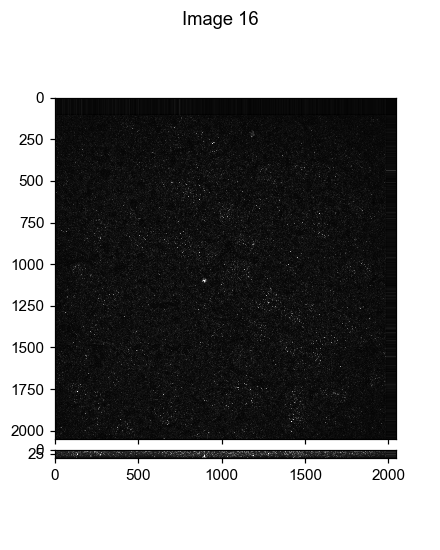

In [12]:
visual_tools.imshow_mark_3d_v2(rna_ims)

In [10]:

channel_2_th = {
    '750':1000,
    '647':1500,
}
#intensity_th = 1000

sel_crop = ia.classes.preprocess.ImageCrop_3d([[0,50],[200,400],[510,710]])

fov._load_from_file('rna')



sel_spots, sel_ids = [],[]

for _i, (_ch, _spots) in enumerate(zip(fov.rna_channels, fov.rna_spots_list)):
    
    _kept_spots = sel_crop.crop_spots(_spots)
    _intensity_th = channel_2_th[_ch]
    _kept_spots = _kept_spots[_kept_spots[:,0] > _intensity_th]
    _kept_bits = np.ones(len(_kept_spots), dtype=np.int32) * _i
    
    sel_spots.append(_kept_spots)
    sel_ids.append(_kept_bits)
    
sel_spots = np.concatenate(sel_spots)
sel_ids = np.concatenate(sel_ids)


+ loading rna from file: D:\Pu_Temp\20211129-P_brain_CTP12-RNA_warpped\Conv_zscan_035.hdf5


<IPython.core.display.Javascript object>


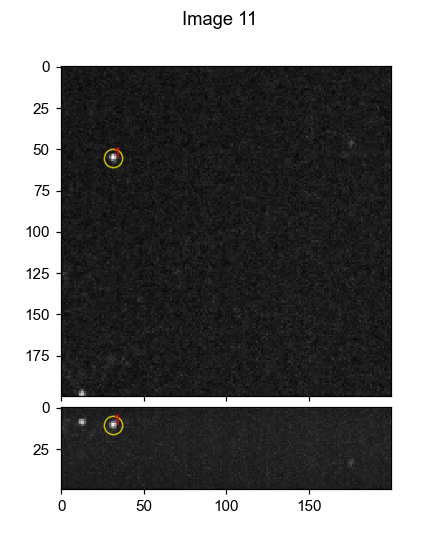

In [11]:
coord_dict = {
    'coords': np.fliplr(sel_spots[:,1:4]),
    'class_ids': sel_ids,
}
visual_tools.imshow_mark_3d_v2([_im[sel_crop.to_slices()] for _im in rna_ims],
                               given_dic=coord_dict)

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA\H0R1.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA\H0R1\Conv_zscan_035.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA\H0R1\Conv_zscan_035.dax  in 4.938s
-- removing hot pixels for channels:['405'] in 3.456s
-- correct Z-shifts for channels:['405'] in 3.480s
-- illumination correction for channels: 405, in 1.107s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 13.332s
-- saving fov_info to file: D:\Pu_Temp\20211129-P_brain_CTP12-RNA_warpped\Conv_zscan_035.hdf5
++ base attributes saved:['dapi_im'] in 4.532s.


In [16]:
fov.shared_parameters['corr_gaussian_highpass'] = False

_overwrite = False
_warp = True
# 2. Process image into candidate spots
fov.parallel = False
fov.protein_ref_id = 0

fov._process_image_to_spots('protein', 
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=_warp, 
                            _fit_spots=False,
                            _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

-- folders not selected, allow processing all 14 folders
-- checking protein, region:[1] in 0.009s.
+ Start sequential pre-processing for 1 images
++ processed protein ids: [1] + batch process image: \\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA\H0R1\Conv_zscan_035.dax for channels:['488']
- loading protein info from file:Conv_zscan_035.hdf5 in 0.186s.
- writting protein info to file:D:\Pu_Temp\20211129-P_brain_CTP12-RNA_warpped\Conv_zscan_035.hdf5
-- images and drifts already exist, skip.
-- no updates in drift, skip.
in 0.58s.


In [17]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['protein']
    protein_ims = _grp['ims'][:]
    #protein_ids = _grp['ids'][:]

# save images
np.save(fov.save_filename.replace('.hdf5','_polyt'), protein_ims[0])
np.save(fov.save_filename.replace('.hdf5','_dapi'), dapi_im)

<IPython.core.display.Javascript object>


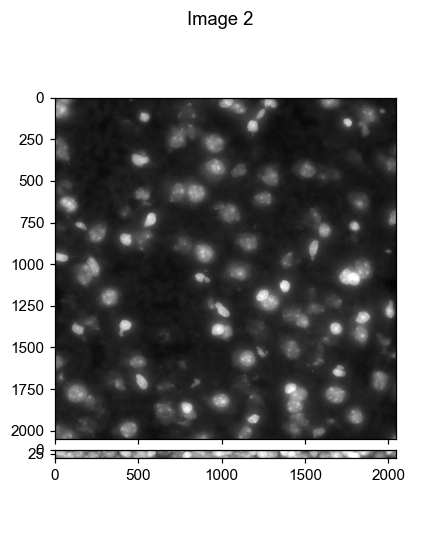

In [18]:
visual_tools.imshow_mark_3d_v2([protein_ims[0], dapi_im])

<IPython.core.display.Javascript object>


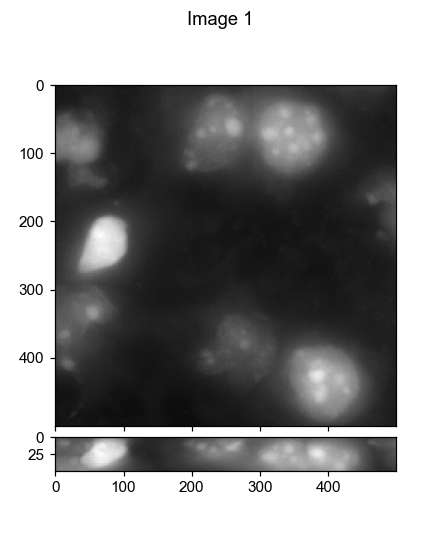

In [86]:
visual_tools.imshow_mark_3d_v2([dapi_im[:,500:1000,500:1000]])

In [25]:
from cellpose import utils
from cellpose import models

In [89]:
test_dapi_im = fov.dapi_im[:,500:1000,500:1000]
blank_im = np.zeros(np.shape(test_dapi_im), dtype=np.uint16)

model_2d = models.Cellpose(gpu=True, model_type='nuclei')
masks_2d, flows_2d, styles_2d, diams_2d = model_2d.eval(np.stack([blank_im,blank_im,test_dapi_im], axis=3), 
                                                        diameter=80, channels=[0,0], 
                                                        min_size=200,
                                                        anisotropy=250./108,
                                                        stitch_threshold=0.1,
                                                        do_3D=True)

** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (500, 500) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZY: 500 planes of size (50, 500) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZX: 500 planes of size (50, 500) 




100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 25.02it/s]


flows computed 8.60s
dynamics computed 12.18s
masks computed 16.47s
estimated masks for 1 image(s) in 33.18 sec
>>>> TOTAL TIME 33.18 sec


<IPython.core.display.Javascript object>


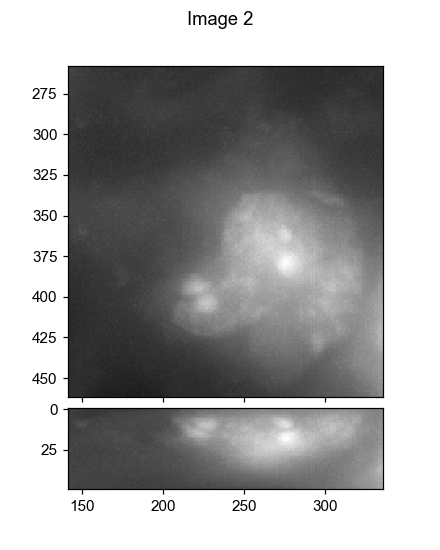

In [95]:
visual_tools.imshow_mark_3d_v2([np.array(masks_2d), test_dapi_im])

In [36]:
torch.cuda.empty_cache()

In [96]:
0.05*2048

102.4

In [97]:
fov.rna_drifts

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [ -0.25666666,   0.24333334,   4.3766665 ],
       [ -0.25666666,   0.24333334,   4.3766665 ],
       [  0.42333335,  90.99333   , -52.68667   ],
       [  0.42333335,  90.99333   , -52.68667   ],
       [  0.26      , 104.683334  , -60.73      ],
       [  0.26      , 104.683334  , -60.73      ],
       [  0.28      , 103.63      , -62.103333  ],
       [  0.28      , 103.63      , -62.103333  ],
       [  0.29      , 104.15667   , -64.55      ],
       [  0.29      , 104.15667   , -64.55      ],
       [  0.56      , 104.60667   , -65.89333   ],
       [  0.56      , 104.60667   , -65.89333   ],
       [  0.58666664, 103.89      , -64.736664  ],
       [  0.58666664, 103.89      , -64.736664  ],
       [  0.49      , 104.52      , -63.546665  ],
       [  0.49      , 104.52      , -63.546665  ],
       [  0.57666665, 103.21667   , -64.816666  ],
       [  0.57666665, 103.21667

In [263]:
reload(ia.classes.preprocess)
def generate_overlap_crops_3d(crop_size:list or np.ndarray, 
                              image_size:list or np.ndarray, 
                              overlap_size:list or np.ndarray):
    """Function to generate overlapping ImageCrop_3d"""
    _ndim = 3
    crop_size = np.array(crop_size).copy()[:_ndim]
    image_size = np.array(image_size).copy()[:_ndim]
    overlap_size = np.array(overlap_size).copy()[:_ndim]
    
    # check inputs
    if (crop_size > image_size).any():
        raise ValueError(f"crop_size:{crop_size} is larger than image_size:{image_size}")
    if (overlap_size > crop_size).any():
        raise ValueError(f"overlap_size:{overlap_size} is larger than crop_size:{crop_size}")
    
    overlap_size[image_size==crop_size] = 0
    
    # determine crop edges
    num_crops = np.ceil(image_size / crop_size).astype(np.int32)
    
    crop_indices = np.indices(num_crops).reshape(_ndim, -1).transpose()
    
    all_crops = np.ndarray(num_crops, dtype=object)
    
    for _inds in crop_indices:
        left_lim = np.max([_inds * crop_size - overlap_size, np.zeros(_ndim)], axis=0)
        right_lim = np.min([(_inds+1) * crop_size, image_size], axis=0)
        
        _crop = ia.classes.preprocess.ImageCrop_3d(np.array([left_lim, right_lim]).transpose())
        all_crops[tuple(_inds)] = _crop
    
    return all_crops

In [264]:
crops = generate_overlap_crops_3d(
    [50,512,512],
    fov.shared_parameters['single_im_size'],
    [20,128,128],
)

In [265]:
np.ravel(crops)[1].relative_overlap(np.ravel(crops)[0]).array

array([[  0,  50],
       [  0, 512],
       [  0, 128]])

In [267]:
np.ravel(crops)[1].distance_to_edge([1,2,3])

1

In [583]:
default_cellpose_kwargs = {
    'diameter': 80, 
    'min_size': 200,
    'stitch_threshold': 0.1,
}

def segmentation_3d_cellpose(raw_im, 
                             pixel_sizes,
                             apply_gaussian=False,
                             gaussian_size=1., 
                             apply_highpass_gaussian=False,
                             highpass_gaussian_kwargs={},
                             cellpose_gpu=True,
                             cellpose_kwargs={},
                             make_plot=True,
                             ):
    """Function to segment single image"""
    if apply_gaussian:
        from scipy.ndimage.filters import gaussian_filter
        _im = gaussian_filter(raw_im, gaussian_size)
    else:
        _im = raw_im.copy()
    
    if apply_highpass_gaussian:
        _im = ia.correction_tools.filters.gaussian_high_pass_filter(
            _im, **highpass_gaussian_kwargs,
        )
    # cellpose segmentation
    import torch
    if torch.cuda.is_available():
        _use_gpu=True
    else:
        _use_gpu=False
    blank_im = np.zeros(np.shape(_im), dtype=np.uint16)
    model = models.Cellpose(gpu=_use_gpu, model_type='nuclei')
    {_k:_v for _k,_v in default_cellpose_kwargs.items()}.update(cellpose_kwargs)

    masks, flows, styles, diams = model.eval(np.stack([blank_im,blank_im,_im], axis=3), 
                                             channels=[0,0],
                                             anisotropy=pixel_sizes[0]/pixel_sizes[1],
                                             do_3D=True,
                                             **default_cellpose_kwargs,
                                             )
    # visualize
    ################
    
    return masks
    

In [160]:
small_masks = []
for _crop in np.ravel(crops):
    _msk = segmentation_3d_cellpose(dapi_im[_crop.to_slices()], 
                                    fov.shared_parameters['distance_zxy'])
    small_masks.append(_msk)

** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (512, 512) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZY: 512 planes of size (50, 512) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZX: 512 planes of size (50, 512) 




100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 24.88it/s]


flows computed 9.02s
dynamics computed 11.38s
masks computed 15.66s
estimated masks for 1 image(s) in 33.65 sec
>>>> TOTAL TIME 33.65 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (512, 640) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZY: 512 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 512) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 24.64it/s]


flows computed 10.92s
dynamics computed 14.88s
masks computed 20.18s
estimated masks for 1 image(s) in 41.58 sec
>>>> TOTAL TIME 41.58 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (512, 640) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZY: 512 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 512) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 24.69it/s]


flows computed 10.71s
dynamics computed 15.57s
masks computed 21.02s
estimated masks for 1 image(s) in 42.38 sec
>>>> TOTAL TIME 42.38 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (512, 640) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZY: 512 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 512) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 24.75it/s]


flows computed 10.71s
dynamics computed 14.26s
masks computed 19.61s
estimated masks for 1 image(s) in 41.68 sec
>>>> TOTAL TIME 41.68 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels

 running YX: 50 planes of size (640, 512) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 512) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZX: 512 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 19.85it/s]


flows computed 11.15s
dynamics computed 14.68s
masks computed 20.29s
estimated masks for 1 image(s) in 41.87 sec
>>>> TOTAL TIME 41.87 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.24it/s]


flows computed 12.88s
dynamics computed 18.26s
masks computed 25.63s
estimated masks for 1 image(s) in 52.40 sec
>>>> TOTAL TIME 52.40 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.29it/s]


flows computed 12.93s
dynamics computed 19.00s
masks computed 26.37s
estimated masks for 1 image(s) in 53.51 sec
>>>> TOTAL TIME 53.51 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.65it/s]


flows computed 12.85s
dynamics computed 16.82s
masks computed 23.87s
estimated masks for 1 image(s) in 50.35 sec
>>>> TOTAL TIME 50.35 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 512) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 512) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZX: 512 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 20.58it/s]


flows computed 10.80s
dynamics computed 14.71s
masks computed 19.98s
estimated masks for 1 image(s) in 42.01 sec
>>>> TOTAL TIME 42.01 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.82it/s]


flows computed 12.91s
dynamics computed 16.06s
masks computed 22.74s
estimated masks for 1 image(s) in 49.41 sec
>>>> TOTAL TIME 49.41 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.30it/s]


flows computed 12.85s
dynamics computed 18.00s
masks computed 24.93s
estimated masks for 1 image(s) in 51.32 sec
>>>> TOTAL TIME 51.32 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.32it/s]


flows computed 12.84s
dynamics computed 17.00s
masks computed 23.99s
estimated masks for 1 image(s) in 50.28 sec
>>>> TOTAL TIME 50.28 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 512) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 512) 




  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


 running ZX: 512 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 20.16it/s]


flows computed 10.74s
dynamics computed 14.87s
masks computed 21.19s
estimated masks for 1 image(s) in 43.88 sec
>>>> TOTAL TIME 43.88 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.60it/s]


flows computed 12.68s
dynamics computed 16.69s
masks computed 23.32s
estimated masks for 1 image(s) in 49.70 sec
>>>> TOTAL TIME 49.70 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.43it/s]


flows computed 12.75s
dynamics computed 17.84s
masks computed 24.88s
estimated masks for 1 image(s) in 51.67 sec
>>>> TOTAL TIME 51.67 sec
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


 running YX: 50 planes of size (640, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZY: 640 planes of size (50, 640) 




  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


 running ZX: 640 planes of size (50, 640) 




100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.62it/s]


flows computed 12.60s
dynamics computed 18.06s
masks computed 25.09s
estimated masks for 1 image(s) in 51.47 sec
>>>> TOTAL TIME 51.47 sec


In [588]:
torch.cuda.empty_cache()

In [593]:
?cellpose.models.Cellpose.eval

In [594]:
rescale

NameError: name 'rescale' is not defined

In [595]:
_msk = segmentation_3d_cellpose(dapi_im,#[_crop.to_slices()], 
                                fov.shared_parameters['distance_zxy'],
                                
                               cellpose_kwargs={'diameter': 50, 
                                                'rescale':3, 
                                                'resample':False,}
                               )

** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
multi-stack tiff read in as having 50 planes 3 channels


  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


 running YX: 50 planes of size (2048, 2048) 




  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 222.00 MiB (GPU 0; 8.00 GiB total capacity; 5.94 GiB already allocated; 0 bytes free; 6.29 GiB reserved in total by PyTorch)

In [145]:
fov.shared_parameters['distance_zxy']

[250, 108, 108]

In [184]:
reload(ia.classes.preprocess)

<module 'ImageAnalysis3.classes.preprocess' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\preprocess.py'>

In [597]:
torch.cuda.empty_cache()

In [571]:
def merge_splitted_masks(crops,
                         masks,
                         image_size, 
                         min_size=1500,
                         merge_per_th=0.,
                         ):
    
    merged_mask = np.zeros(image_size, dtype=np.uint16)
    processed_crops = []
    processed_masks = []
    # loop through masks
    
    for _i, (_crop, _mask) in enumerate(zip(crops, masks)):
        # update mask to prevent sharing labels
        _updated_mask = _mask.copy() + np.max(merged_mask)
        _updated_mask[_updated_mask==np.max(merged_mask)] = 0
        # case 1: if entirely empty, update given area directly
        _target_msk = merged_mask[_crop.to_slices()]
        if (_target_msk==0).all():
            merged_mask[_crop.to_slices()] = _updated_mask
        # case 2: find overlapping area
        else:
            _overlap_crops = [_crop.overlap(_c2) 
                              for _c2 in processed_crops 
                              if _crop.overlap(_c2) is not None]
            # generate overlap masks 
            _overlap_masks = [merge_overlapping_mask(_updated_mask, _crop,
                                                    _m2, _c2, min_size, merge_per_th)
                              for _c2, _m2 in zip(processed_crops, processed_masks) 
                              if _crop.overlap(_c2) is not None]
            # update all first
            merged_mask[_crop.to_slices()] = _updated_mask
            # re-update overlap masks\\
            print(len(_overlap_crops), len(_overlap_masks))
            for _oc, _om in zip(_overlap_crops, _overlap_masks):
                merged_mask[_oc.to_slices()] = _om
                
        # append this processed crop
        processed_crops.append(_crop)
        processed_masks.append(_updated_mask)
    
    
    return merged_mask

In [572]:
mmsk = merge_splitted_masks(np.ravel(crops), small_masks, fov.shared_parameters['single_im_size'])

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in long_scalars


1 1
1 1
1 1
2 2
4 4
4 4
3 3
2 2
4 4
4 4
3 3
2 2
4 4
4 4
3 3


In [568]:
def merge_overlapping_mask(mask1, crop1,
                           mask2, crop2,
                           min_size=200,
                           merge_per_th=0.,
                           verbose=False,
                           ):
    from scipy.ndimage.measurements import center_of_mass
    if verbose:
        print(f"-- merge overlapping mask")
    
    _o1_crop = crop1.relative_overlap(crop2)
    _o2_crop = crop2.relative_overlap(crop1)
        
    _o1_mask = mask1[_o1_crop.to_slices()]
    _o2_mask = mask2[_o2_crop.to_slices()]
    
    _overlap_mask = np.zeros(np.shape(_o1_mask), dtype=np.uint16)
    
    for _m1 in np.unique(_o1_mask):
        if _m1 > 0:
            _overlap_markers = np.unique(_o2_mask[_o1_mask==_m1])
            # remove small markers
            _o_sizes = np.array([np.sum(_o2_mask==_om) for _om in _overlap_markers])
            _overlap_markers = _overlap_markers[(_overlap_markers>0) * (_o_sizes > min_size)]
            if len(_overlap_markers) == 0:
                if verbose:
                    print(f'--- save uinque mask {_mk}')
                _overlap_mask[_o1_mask==_m1] = _m1
            else:
                # keep the largest sized marker first
                #print(_m1, _overlap_markers)
                #_m1_size = np.sum(mask1==_m1)
                #_m2_sizes = [np.sum(mask1==_m2) for _m2 in _overlap_markers]
                
                _mks = [_m1]+list(_overlap_markers)
                _crop_ref_dicts = {_m1:_o1_mask}
                _crop_ref_dicts.update({_m2:_o2_mask for _m2 in _overlap_markers})
                _ref_dicts = {_m1:[crop1, mask1]}
                _ref_dicts.update({_m2:[crop2, mask2] for _m2 in _overlap_markers})
                # size 
                _sizes = [np.sum(_crop_ref_dicts[_mk]==_mk) for _mk in _mks] #[_m1_size]+list(_m2_sizes)
                # dist
                #_m1_dist = crop1.distance_to_edge(center_of_mass(mask1, labels=mask1, index=[_m1])[0],)
                #_m2_cts = center_of_mass(mask2, labels=mask2, index=_overlap_markers)
                #_m2_dists = [crop2.distance_to_edge(_ct) for _ct in _m2_cts]
                #_dists = [_m1_dist] + _m2_dists
                _dists = [np.sum(mask1==_m1)] + [np.sum(mask2==_m2) for _m2 in _overlap_markers]
                
                # initialize target mask
                _target_mk = _mks[np.argmax(_sizes)]
                _target_dist = _dists[_mks.index(_target_mk)]
                
                #_dists = [_c.distance_to_edge(center_of_mass(_m, labels=_m, index=[_mk])[0],
                #                            ) for _mk, (_c,_m) in _ref_dicts.items()]
                #print('dists', _dists)
                for _i in np.argsort(_sizes)[::-1]:
                    
                    _mk = _mks[_i]
                    _dist = _dists[_i]

                    _ref_mask = _crop_ref_dicts[_mk]
                    _share_mask = (_ref_mask==_mk) * (_overlap_mask==_target_mk)
                    _valid_mask = (_ref_mask==_mk) * (_overlap_mask==0)
                    #print(_mk, np.sum(_share_mask),np.sum(_valid_mask),
                    #      np.sum(_share_mask) / np.sum(_ref_mask==_mk), 
                    #      np.sum(_share_mask) / np.sum(_overlap_mask==_target_mk), )

                    
                    if (np.sum(_share_mask) / np.sum(_ref_mask==_mk) > merge_per_th \
                        or np.sum(_share_mask) / np.sum(_overlap_mask==_target_mk) > merge_per_th):

                        # choose which mask to be used
                        #_target_crop, _target_mask = _ref_dicts[_target_mk]
                        
                        #_target_dist = _target_crop.distance_to_edge(
                        #                    center_of_mass(_target_mask, labels=_target_mask, index=[_target_mk])[0],
                        #                    )
                        #_new_crop, _new_mask = _ref_dicts[_mk]
                        #_new_dist = _new_crop.distance_to_edge(
                        #                    center_of_mass(_new_mask, labels=_new_mask, index=[_mk])[0],
                        #                    )
                        #print(_target_dist, _new_dist)
                        
                        if _target_dist > _dist:
                            if verbose:
                                print(f'--- merge mask {_mk} into {_target_mk}')
                            _overlap_mask[_valid_mask] = _target_mk
                        else:
                            if verbose:
                                print(f'--- merge mask {_target_mk} into {_mk}')
                            _overlap_mask[_valid_mask] = _mk
                            _overlap_mask[_overlap_mask==_target_mk] = _mk
                            # update target mask
                            _target_mk = _mk
                            _target_dist = _dists[_mks.index(_target_mk)]
                    
                    elif np.sum(_valid_mask) > min_size:
                        if verbose:
                            print(f'--- save mask {_mk}')
                        _overlap_mask[_valid_mask] = _mk
                        # update target mask
                        _target_mk = _mk
                        _target_dist = _dists[_mks.index(_target_mk)]
                    else:
                        if verbose:
                            print(f"--- skip mask: {_mk}")
                            
    if verbose:
        print(f"-- {np.sum(np.unique(_overlap_mask) >0)} labels saved.")
    return _overlap_mask#, _o1_mask, _o2_mask
                    
                
                

In [565]:
%%time
ids = [5,6]
_upmsk = small_masks[ids[1]].copy() + small_masks[ids[0]].max()
_upmsk[_upmsk==small_masks[ids[0]].max()] = 0
omsks = merge_overlapping_mask(small_masks[ids[0]], np.ravel(crops)[ids[0]],
                       _upmsk, np.ravel(crops)[ids[1]], 
                               min_size=1500, verbose=True)

-- merge overlapping mask


E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in long_scalars


--- save mask 40
--- merge mask 22 into 40
--- save mask 53
--- merge mask 24 into 53
--- save mask 51
--- merge mask 51 into 25
--- merge mask 56 into 25
--- save mask 47
--- merge mask 47 into 26
-- 4 labels saved.
Wall time: 1.76 s


[ 0 25 26 40 53]


<IPython.core.display.Javascript object>


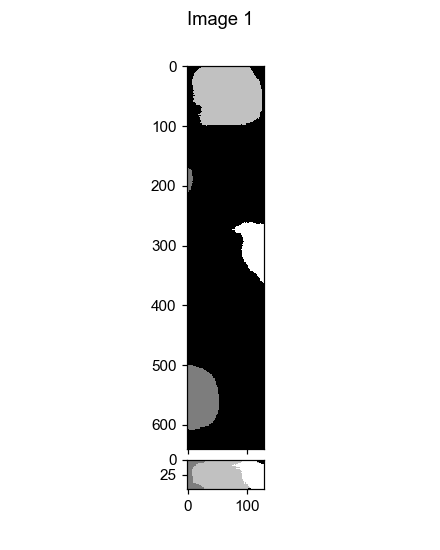

In [555]:
print(np.unique(omsks[0]))
visual_tools.imshow_mark_3d_v2(omsks)


<IPython.core.display.Javascript object>


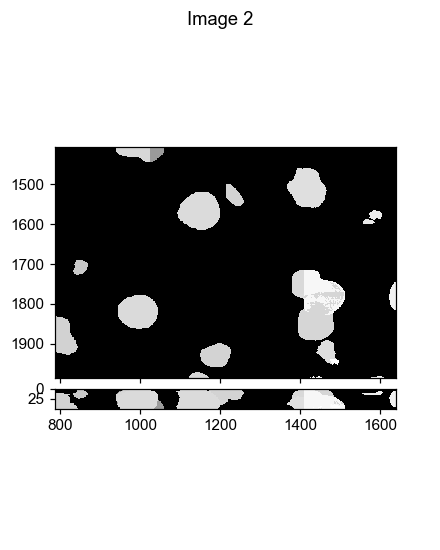

In [573]:
visual_tools.imshow_mark_3d_v2([dapi_im, mmsk])

In [424]:
_crop.to_slices()

(slice(0, 50, None), slice(1408, 2048, None), slice(1408, 2048, None))

In [215]:
np.ravel(crops)[0].array, np.ravel(crops)[1].array

(array([[  0,  50],
        [  0, 512],
        [  0, 512]]), array([[   0,   50],
        [   0,  512],
        [ 384, 1024]]))

In [233]:
np.ravel(crops)[0].relative_overlap(np.ravel(crops)[1]).array

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [209]:
print(ia.classes.preprocess.ImageCrop.__self__)

AttributeError: type object 'ImageCrop' has no attribute '__self__'

In [178]:
overlap(np.ravel(crops)[0], np.ravel(crops)[1])

[[  0  50]
 [  0 512]
 [384 512]]


<IPython.core.display.Javascript object>


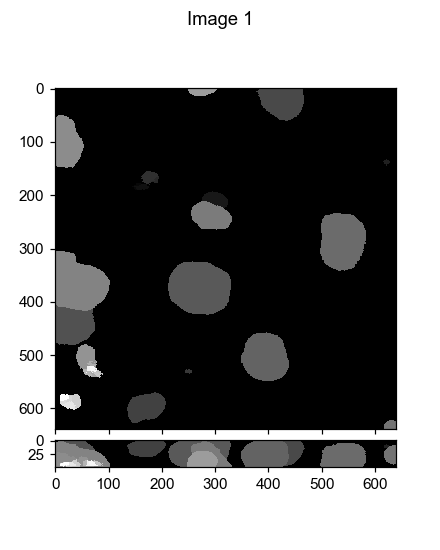

In [161]:
visual_tools.imshow_mark_3d_v2([_msk, dapi_im[_crop.to_slices()]])